# Actividad 4-4 Maquinas de Soporte Vectorial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 1. Recodificación de variables categóricas

In [2]:
Df_RH = pd.read_csv("recursos_humanos.csv")

# Recodificación
Dumm_sales = pd.get_dummies(Df_RH.sales)
Dumm_salary = pd.get_dummies(Df_RH.salary)

## Integración del DataFrame
Df_RHv1 = Df_RH[["left","satisfaction_level", "last_evaluation", "average_montly_hours", "time_spend_company", "Work_accident", 
                 "promotion_last_5years"]]
Df_RHv2 = pd.concat([Df_RHv1, Dumm_sales, Dumm_salary], axis=1, join="inner")
Df_RHv2

,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,1,0.38,0.53,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0.80,0.86,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0.11,0.88,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0.72,0.87,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0.37,0.52,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1,0.40,0.57,151,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,1,0.37,0.48,160,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,1,0.37,0.53,143,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,1,0.11,0.96,280,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


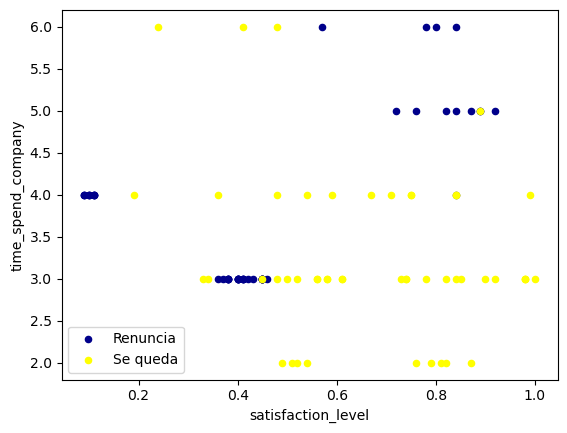

In [3]:
## Graficación y Revisión de los datos 
ax = Df_RHv2[Df_RHv2["left"] == 1][0:50].plot(kind="scatter", x="satisfaction_level", y="time_spend_company", color="DarkBlue", label="Renuncia")
ax = Df_RHv2[Df_RHv2["left"] == 0][0:50].plot(kind="scatter", x="satisfaction_level", y="time_spend_company", color="Yellow", label="Se queda", ax=ax)
plt.show()

## 2. Preprocesamiento de datos y selección de grupos

In [4]:
Df_RHv2.dtypes
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["IT"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["RandD"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["accounting"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["hr"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["management"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["marketing"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["product_mng"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["sales"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["support"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["technical"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["high"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["low"], errors = "coerce").notnull()]
Df_RHv2 = Df_RHv2[pd.to_numeric(Df_RHv2["medium"], errors = "coerce").notnull()]

Df_RHv2.dtypes

left                       int64
satisfaction_level       float64
last_evaluation          float64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
IT                         uint8
RandD                      uint8
accounting                 uint8
hr                         uint8
management                 uint8
marketing                  uint8
product_mng                uint8
sales                      uint8
support                    uint8
technical                  uint8
high                       uint8
low                        uint8
medium                     uint8
dtype: object

In [5]:
## División de X y Y y normalización

feature_RH = Df_RHv2.drop(["left"], axis=1)
X_norm = (feature_RH - np.min(feature_RH)) / (np.max(feature_RH) - np.min(feature_RH))
X = np.asarray(X_norm)
X[0:5]

array([[0.31868132, 0.265625  , 0.28504673, 0.125     , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.78021978, 0.78125   , 0.77570093, 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.02197802, 0.8125    , 0.82242991, 0.25      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.69230769, 0.796875  , 0.59345794, 0.375     , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.   

In [6]:
Y = np.asarray(Df_RHv2["left"])
Y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [7]:
## Creación de los grupos de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print("Grupo de entrenamiento", x_train.shape, y_train.shape)
print("Grupo de prueba", x_test.shape, y_test.shape)

Grupo de entrenamiento (11999, 19) (11999,)
Grupo de prueba (3000, 19) (3000,)


## 3. Modelo de Kernel Lineal

In [8]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Mod_lin = svm.SVC(kernel="linear")
Mod_lin.fit(x_train, y_train)

y_hat_lin = Mod_lin.predict(x_test)
y_pred_lin = Mod_lin.predict(X)
cm_lin = confusion_matrix(y_test, y_hat_lin)
cm_lin

array([[2125,  142],
       [ 529,  204]], dtype=int64)

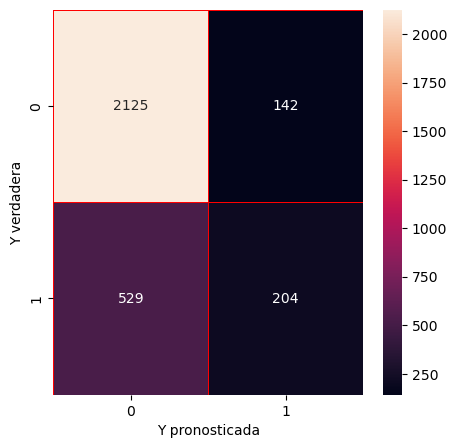

In [9]:
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm_lin, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("Y pronosticada")
plt.ylabel("Y verdadera")
plt.show()

In [10]:
cnf_matrix_lin = confusion_matrix(y_test, y_hat_lin, labels=[0,1])
print(classification_report(y_test, y_hat_lin))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2267
           1       0.59      0.28      0.38       733

    accuracy                           0.78      3000
   macro avg       0.70      0.61      0.62      3000
weighted avg       0.75      0.78      0.75      3000



## Interpretación
El Modelo Lineal tuvo una alta precisión para la predicción de las personas que se quedan, sin embargo obtuvo una baja calificación en la predicción de los trabajadores que se van (0.59), presentando una accuracy de 0.78, la cual no es buen modelo para tratar de predecir cuando una persona renunciará.

## 4. Modelo con kernel Polynomial

In [11]:
Mod_pol = svm.SVC(kernel="poly")
Mod_pol.fit(x_train, y_train)

y_hat_pol = Mod_pol.predict(x_test)
y_pred_pol = Mod_pol.predict(X)
cm_pol = confusion_matrix(y_test, y_hat_pol)
cm_pol

array([[2121,  146],
       [ 125,  608]], dtype=int64)

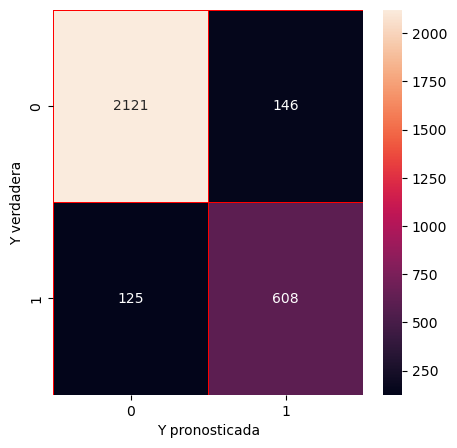

In [12]:
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm_pol, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("Y pronosticada")
plt.ylabel("Y verdadera")
plt.show()

In [13]:
cnf_matrix_pol = confusion_matrix(y_test, y_hat_pol, labels=[0,1])
print(classification_report(y_test, y_hat_pol))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2267
           1       0.81      0.83      0.82       733

    accuracy                           0.91      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.91      0.91      0.91      3000



## Interpretación
El modelo Polinomial obtuvo un f1 score de 0.94 para predecir los trabajadores que se quedan, así como un 0.82 para la predicción de los trabajadores que renunciaron, siendo ambos muy altos indicadores y haciendo que el nivel de precisión de este modelo sea muy bueno. 

## 5. Modelo con kernel RFB

In [14]:
Mod_RFB = svm.SVC(kernel="rbf")
Mod_RFB.fit(x_train, y_train)

y_hat_RFB = Mod_RFB.predict(x_test)
y_pred_RFB = Mod_RFB.predict(X)
cm_RFB = confusion_matrix(y_test, y_hat_RFB)
cm_RFB

array([[2114,  153],
       [ 134,  599]], dtype=int64)

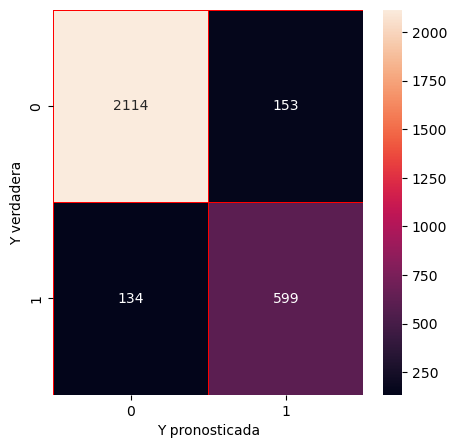

In [15]:
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm_RFB, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("Y pronosticada")
plt.ylabel("Y verdadera")
plt.show()

In [16]:
cnf_matrix_RFB = confusion_matrix(y_test, y_hat_RFB, labels=[0,1])
print(classification_report(y_test, y_hat_RFB))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2267
           1       0.80      0.82      0.81       733

    accuracy                           0.90      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.91      0.90      0.90      3000



## Interpretación
El Modelo RFB también obtuvo calificaciones sobresalientes tanto para la predicción de renuncias como para los trabajadores que se quedaron, siendo un poco más bajas que el modelo Polinomial pero dentro del rango de lo sobresaliente.

# Modelo de Kernel Sigmoide

In [17]:
Mod_Sig = svm.SVC(kernel="sigmoid")
Mod_Sig.fit(x_train, y_train)

y_hat_Sig = Mod_Sig.predict(x_test)
y_pred_Sig = Mod_Sig.predict(X)
cm_Sig = confusion_matrix(y_test, y_hat_Sig)
cm_Sig

array([[1805,  462],
       [ 467,  266]], dtype=int64)

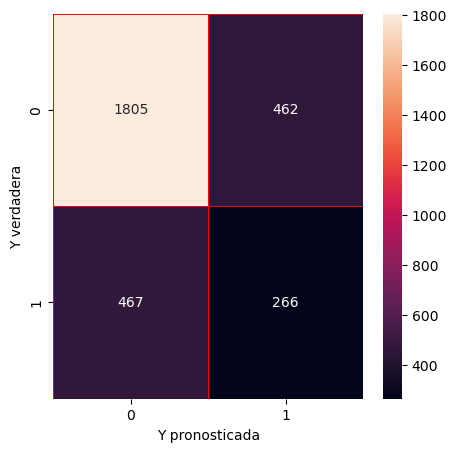

In [18]:
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm_Sig, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("Y pronosticada")
plt.ylabel("Y verdadera")
plt.show()

In [19]:
cnf_matrix = confusion_matrix(y_test, y_hat_Sig, labels=[0,1])
print(classification_report(y_test, y_hat_Sig))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2267
           1       0.37      0.36      0.36       733

    accuracy                           0.69      3000
   macro avg       0.58      0.58      0.58      3000
weighted avg       0.69      0.69      0.69      3000



## Interpretación
El modelo Sigmoide presenta mejores resultados para predecir los trabajadores que renunciarán, pero su capacidad de predecir las renuncias se queda muy corta a comparación de los Modelos Polinomial y RFB.

In [20]:
## Impresión de los 4 reportes de los modelos utilizados

print("Resultados del Modelo de Kernel Lineal")
print(classification_report(y_test, y_hat_lin))
print("Resultados del Modelo de Kernel Polinomial")
print(classification_report(y_test, y_hat_pol))
print("Resultados del Modelo de Kernel RFB")
print(classification_report(y_test, y_hat_RFB))
print("Resultados del Modelo de Kernel Sigmoide")
print(classification_report(y_test, y_hat_Sig))

Resultados del Modelo de Kernel Lineal
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2267
           1       0.59      0.28      0.38       733

    accuracy                           0.78      3000
   macro avg       0.70      0.61      0.62      3000
weighted avg       0.75      0.78      0.75      3000

Resultados del Modelo de Kernel Polinomial
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2267
           1       0.81      0.83      0.82       733

    accuracy                           0.91      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.91      0.91      0.91      3000

Resultados del Modelo de Kernel RFB
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2267
           1       0.80      0.82      0.81       733

    accuracy                           0.90      3000
   macro a

## Conclusión
Viendo el desempeño de los diversos modelos de maquinas de soporte vectorial, el que presentó los mejores resultados a la hora de predecir fue el modelo Polinomial, ya que obtuvo la mayor cantidad de puntuaciones en todas las evaluaciones, seguido por el modelo RFB, los cuales son excelentes para determinar el momento en el que un trabajador es más o menos propenso a renunciar.

En contraste, tanto el modelo lineal como el modelo Sigmoide tuvieron muy bajas puntuaciones a la hora de predecir las renuncias, por lo que no son confiables para este caso en particular.

In [21]:
## Resultados para predecir la acción de un empleado

                        ### Primera línea = ejemplo del trabajador
punt_trab = np.array([[0.5, 0.75, 200, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
                      [0.8, 0.46, 245, 6, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                      [0.66, 0.59, 180, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]])


Mod_pol_ej = svm.SVC(kernel="poly")
Mod_pol_ej.fit(x_train, y_train)

y_hat_ej = Mod_lin.predict(punt_trab)
y_hat_ej

array([1, 1, 1], dtype=int64)

## Interpretación
Para el ejemplo de la puntuación del trabajador se hizo la predicción utilizando el modelo que mostró mayor puntuación (Polinomial) y salió como resultado 1, es decir, que el trabajador renunciará.